In [1]:
import numpy as np
import matplotlib.pyplot as plt

# r: (Kxd)
def log_likelihood(X,K,pi,mean,s):
    n, d = X.shape
    l = 0
    eps = 1e-5
    for i in range(n):
        ri = 0
        for k in range(K):
            product = np.prod(s[k])
            if product==0:
                product += eps
            val=pi[k]*np.exp(-0.5*np.sum((X[i]-mean[k])**2/s[k]))/np.sqrt(2*np.pi*product)
            ri += val
        if ri>0:
            l+=np.log(ri)
    return -l

# X: (nxd)
# K: number of clusters
# s: covariance matrix (Kxd) diagonal values
# mean: mean matrix (Kxd)
# pi: (1xK)
# r: (nxK)
def e_step(X,K,mean,s,pi):
    n, d = X.shape
    r = np.zeros((n,K))
    eps = 1e-5
    for i in range(n):
        ri = np.zeros((K,))
        for k in range(K):
            product = np.prod(s[k])
            if product==0:
                product += eps
            ri[k] = pi[k]*np.exp(-0.5*np.sum((X[i]-mean[k])**2/s[k]))*product**(-0.5)
        r[i] = ri
    
    ri = np.sum(r, axis=1)
    l = log_likelihood(X,K,pi,mean,s)
    for i in range(n):
        if ri[i]!=0:
            r[i]/=ri[i]
    return l,r

# X: input data points (nxd)
# K: number of clusters
def diagonal_gmm(X,K):
    max_iter = 500
    tol = 1e-5
    prev_l = 0
    n,d = X.shape
    # random initialization
    mean = np.random.uniform(tol,1,(K,d))
    s = np.random.uniform(tol,1,(K,d))
    pi = np.full((K), 1/K)
    for i in range(max_iter):
        # expectation step
        l,r = e_step(X,K,mean,s,pi)
        print("iter:", i, "   l:", round(l, 4))
        # check log likelihood
        if i>0 and np.abs(l-prev_l)<=tol*np.abs(l):
            break
        prev_l = l
        rk = np.sum(r, axis=0)
        # update mixing coeffs
        pi = rk/n
        # update mean
        for k in range(K):
            num = np.zeros((d))
            for i in range(n):
                num += r[i][k]*X[i]
            mean[k] = num/rk[k]
        # update covariance
        for k in range(K):
            num = np.zeros((d,))
            for i in range(n):
                num += r[i][k]*(X[i]-mean[k])**2
            s[k] = num/rk[k]
    return mean, s, pi, r, l


In [2]:
X = np.loadtxt(open("datasets/gmm_dataset.csv", "rb"), delimiter=",")
ls = []
params = []
for k in range(1,11):
    print("k: ", k)
    mean, s, pi, r, l = diagonal_gmm(X,k)
    print("-----")
    ls.append(l)
    arr = [mean, s, pi, r]
    params.append(arr)

# output shows the log likelihood value in each iteration for each k value

k:  1
iter: 0    l: 979312.6936
iter: 1    l: 74573.1734
iter: 2    l: 74534.1105
iter: 3    l: 74534.1105
-----
k:  2
iter: 0    l: 214012.5499
iter: 1    l: 73912.322
iter: 2    l: 71832.987
iter: 3    l: 71180.6046
iter: 4    l: 71156.2967
iter: 5    l: 71156.1528
-----
k:  3
iter: 0    l: 240523.9071
iter: 1    l: 72441.6063
iter: 2    l: 64685.1798
iter: 3    l: 60429.7334
iter: 4    l: 57838.9793
iter: 5    l: 53662.3192
iter: 6    l: 51288.7308
iter: 7    l: 51226.7437
iter: 8    l: 51226.2485
-----
k:  4
iter: 0    l: 230924.9977
iter: 1    l: 71951.4217
iter: 2    l: 64946.8156
iter: 3    l: 55863.1757
iter: 4    l: 52353.7612
iter: 5    l: 48775.2328
iter: 6    l: 46551.0848
iter: 7    l: 46153.7958
iter: 8    l: 46148.7849
iter: 9    l: 46148.764
-----
k:  5
iter: 0    l: 264743.6754
iter: 1    l: 68458.6592
iter: 2    l: 51823.5822
iter: 3    l: 43475.4021
iter: 4    l: 40872.1304
iter: 5    l: 39127.8548
iter: 6    l: 39106.81
iter: 7    l: 39106.8099
-----
k:  6
iter: 0  

C:\Users\Yuna\AppData\Local\Temp\ipykernel_24144\424447704.py:37: RuntimeWarning: divide by zero encountered in divide
  ri[k] = pi[k]*np.exp(-0.5*np.sum((X[i]-mean[k])**2/s[k]))*product**(-0.5)
C:\Users\Yuna\AppData\Local\Temp\ipykernel_24144\424447704.py:37: RuntimeWarning: invalid value encountered in divide
  ri[k] = pi[k]*np.exp(-0.5*np.sum((X[i]-mean[k])**2/s[k]))*product**(-0.5)
C:\Users\Yuna\AppData\Local\Temp\ipykernel_24144\424447704.py:15: RuntimeWarning: divide by zero encountered in divide
  val=pi[k]*np.exp(-0.5*np.sum((X[i]-mean[k])**2/s[k]))/np.sqrt(2*np.pi*product)
C:\Users\Yuna\AppData\Local\Temp\ipykernel_24144\424447704.py:15: RuntimeWarning: invalid value encountered in divide
  val=pi[k]*np.exp(-0.5*np.sum((X[i]-mean[k])**2/s[k]))/np.sqrt(2*np.pi*product)


iter: 2    l: 60435.2769
iter: 3    l: 0
iter: 4    l: 0
-----
k:  8
iter: 0    l: 165705.7883
iter: 1    l: 66680.8458
iter: 2    l: 50392.0466
iter: 3    l: 47612.7541
iter: 4    l: 47546.9964
iter: 5    l: 47525.6102
iter: 6    l: 47513.1866
iter: 7    l: 47504.2164
iter: 8    l: 47497.244
iter: 9    l: 47491.6618
iter: 10    l: 47487.0893
iter: 11    l: 47483.2643
iter: 12    l: 47480.0006
iter: 13    l: 47477.158
iter: 14    l: 47474.6353
iter: 15    l: 47472.374
iter: 16    l: 47470.3527
iter: 17    l: 47468.5706
iter: 18    l: 47467.0281
iter: 19    l: 47465.7133
iter: 20    l: 47464.5996
iter: 21    l: 47463.6512
iter: 22    l: 47462.8313
iter: 23    l: 47462.1089
iter: 24    l: 47461.4621
iter: 25    l: 47460.8785
iter: 26    l: 47460.353
iter: 27    l: 47459.8834
-----
k:  9
iter: 0    l: 200396.8255
iter: 1    l: 71520.181
iter: 2    l: 60092.8853
iter: 3    l: 54732.0803
iter: 4    l: 51426.6724
iter: 5    l: 47551.5718
iter: 6    l: 44335.5542
iter: 7    l: 43456.8762
iter

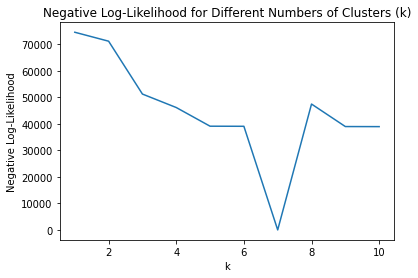

In [3]:
# plot k with negative log-likelihood
k_val = np.arange(1,11)
plt.plot(k_val, ls)
plt.title("Negative Log-Likelihood for Different Numbers of Clusters (k)")
plt.xlabel("k")
plt.ylabel("Negative Log-Likelihood")
plt.show()

In [4]:
# optimal k value is 6
i = 5
mean = params[i][0]
var = params[i][1]
pi = params[i][2]
sorted_idx = np.argsort(pi)
print("k: ", i+1)
print("mean: ", mean[sorted_idx])
print("covariance: ", var[sorted_idx])
print("mixing coefficients: ", pi[sorted_idx])

k:  6
mean:  [[ 1.64786396  0.78876499  0.90640922  1.86847626  2.16585417 -0.88296029
   1.10910244 -0.17298999  0.08907993  0.3673837  -0.19894058  1.56184014
   0.83596485  0.23154183  0.60709883  0.31522091  1.31332308 -0.16041315
   0.08927846 -0.44408782]
 [ 1.70287072  0.27375632  1.02098134  2.51278916  1.7914468  -0.98848407
   0.81045791 -0.19731451 -0.14466924  0.33211905  0.1141951   1.34079659
   0.70435128  0.06896783  0.36226764  0.33300515  1.51504015 -0.22713775
   0.35771321 -0.98205479]
 [-2.56304815  0.60297417  0.90734873 -0.70992483  2.30623822 -1.43950461
   0.06350276 -0.18417542  1.51898963  1.47009917  0.13308303  0.40691051
  -0.85397177 -1.97684459 -0.32116852  0.18215533  1.22248952  1.21355934
  -0.44231737 -0.319573  ]
 [-1.0435501  -1.39364283 -1.70804342  1.91672646 -0.54122689 -0.44188906
  -1.27505433  0.76667454 -1.57565539 -0.22053179 -0.89479522  0.3880448
  -0.5375503  -1.16554328 -0.04041247  0.44094828  0.04643833  0.3026
  -0.65284108 -0.349280